# 绘图的生命周期
这个教程将向你展示一个Matplotlib可视化图像的前、中、后期过程。我们会从一些原始数据开始，最终实现一份自定义的可视化图像的保存。在这个过程中，我们将重点体验Matplotlib的整洁的特性和一些最佳实践案例。

> 这篇教程是基于Chris Moffitt的[一篇博文](https://pbpython.com/effective-matplotlib.html)编写的，由Chris Holdgraf对其进行了改编。

## 关于面向对象的API vs Pyplot
Matplotlib有两种接口，一种是面向对象的（object-oriented, OO）接口，使用这种接口时，我们对`axes.Axes`的一个实例进行操作，以改变`figure.Figure`的某个实例上的可视化图像。

另一种接口基于MATLAB，使用的是基于命令的接口。它被封装在pyplot模块中。如果你想要了解更多这种pyplot接口的知识，详见[Pyplot教程](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)。

本文大多数的术语你应该一眼就能看出它们的含义，但下面两条你还是要重点记一下：
- 最终获得的图像是一个Figure，它可能有一个或多个Axes
- Axes代表的是一个独立的绘图（不要把它和坐标轴“axis”搞混了，axis指的是一张绘图里的x/y轴）

我们通过直接调用Axes里的方法来完成绘图，这能让我们能更有力、更灵活地对绘图进行自定义。

> 大多数情况下，尽量试着使用OO接口而不是pyplot接口

## 我们的数据
我们将会使用这篇教程改编的原博文中使用的数据。这些数据是一些公司的销售数据。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

## 准备开始
这组数据毫无疑问可以使用柱状图进行可视化，柱状图的每个柱子代表一个公司的数据。为了使用面向对象的代码创建这个图像，我们首先需要创建`figure.Figure`和`axes.Axes`的一个实例。Figure就像一块画板，Axes则是画板上的一部分，是我们进行特定可视化的地方。
> Figure里面可以有多个Axes，如果你想要了解怎么做到这一点，详见[Layout tutorial](https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html)。

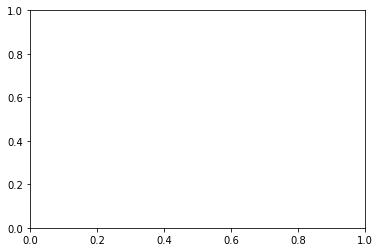

In [2]:
fig, ax = plt.subplots()

这样我们就有了一个Axes实例了，我们可以在上面进行绘图。

<BarContainer object of 10 artists>

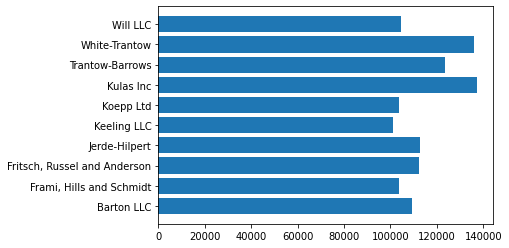

In [3]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

## 变换风格
Matplotlib有许多风格可供选用。你可以根据需要定制你想要的可视化风格。我们可以使用`style`来查看风格的列表

In [4]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


你可以通过下面的代码来激活某种风格：

In [5]:
plt.style.use('fivethirtyeight')

现在让我们重新绘制一次上面的图像，看看它现在会是什么样：

<BarContainer object of 10 artists>

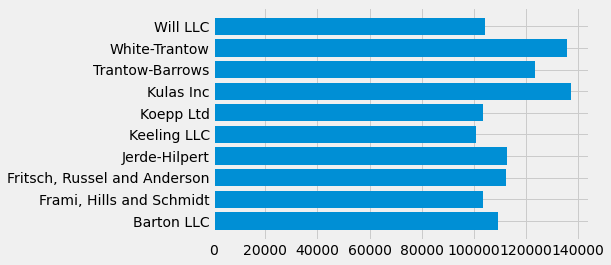

In [6]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

图像的风格会改变图像的很多特性，如颜色、线宽、背景色等。

## 对绘图进行自定义
现在我们已经得到了我们想要的绘图的一般形态，接下来让我们再对它进行调优，让它更符合我们想打印出来的样子。
首先，让我们旋转一下x轴上的标签，让它们看起来更清楚。我们可以通过`axes.Axes.get_xticklabels()`方法获得这些标签：

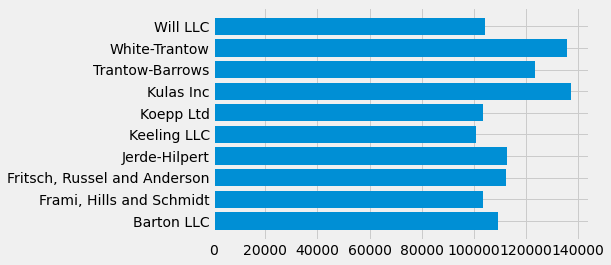

In [7]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()

如果我们想一次设置多个属性，可以选择`pyplot.setp()`函数。它可以接收一个（或多个）由Matplotlib对象组成的列表，然后对列表中的每一个对象的风格的某些属性都进行设置：

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

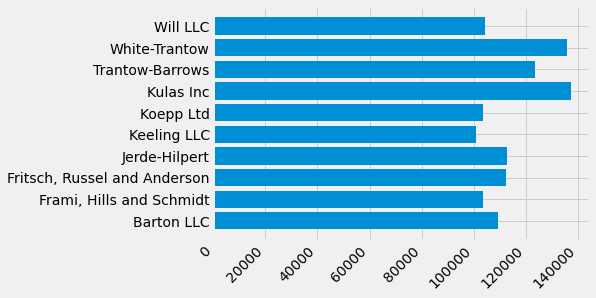

In [8]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

看来有些底部的标签似乎被截断了（译注：默认设置下Matplotlib 3.4.3似乎没有这个问题）。我们可以告诉Matplotlib让它根据我们创建的单位自动为图像增加更多的空间。为此我们需要对**rcParams**的`autolayout`进行设置。关于使用rcParams设置风格、布局和其他属性的更多信息，详见[Customizing Matplotlib with style sheets and rcParams](https://matplotlib.org/stable/tutorials/introductory/customizing.html)。

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

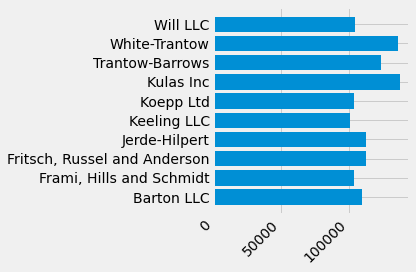

In [9]:
plt.rcParams.update({'figure.autolayout': True})

fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

接下来，我们要为绘图增加标签。要使用OO接口实现这一点，我们可以使用`Artist.set()`方法来对这个Axes对象的属性进行设置。

[(-10000.0, 140000.0),
 Text(0.5, 0, 'Total Revenue'),
 Text(0, 0.5, 'Company'),
 Text(0.5, 1.0, 'Company Revenue')]

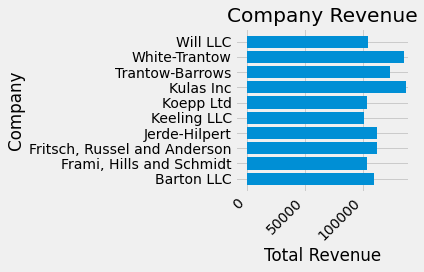

In [10]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company', title='Company Revenue')

我们也可以使用`pyplot.subplots()`函数来调整绘图的大小。通过向函数传入`figure`参数来实现这一点。
> NumPy的索引使用的格式是（行，列），而*figsize*参数使用的格式是（宽，高）。这是由于后者遵循的是可视化时的习惯用法，但很不幸，这种习惯和线性代数中使用的不同。

[(-10000.0, 140000.0),
 Text(0.5, 0, 'Total Revenue'),
 Text(0, 0.5, 'Company'),
 Text(0.5, 1.0, 'Company Revenue')]

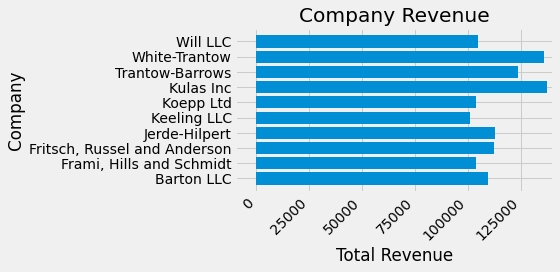

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company', title='Company Revenue')

对标签来说，我们还可以通过函数来对它指定自定义的格式规则。在下面的代码中，我们定义了一个函数，它的输入是一个整数，输出是一个字符串。当这个函数和`Axis.set_major_formatter`或者`Axis.set_minor_formatter`一起使用时，它们会自动创建并使用`ticker.FuncFormatter`类

对于下面的函数，参数`x`是原始的标签，`pos`是刻度的位置。我们在这里只会用到`x`，但是由于`pos`也会被传入，所以两个参数都是必要的。

In [12]:
def currency(x, pos):
    """上面两个参数分别为数值和刻度位置"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x * 1e-6)
    else:
        s = '${:1.0f}K'.format(x * 1e-3)
    return s

我们可以将这个函数用在我们的绘图的标签上。要实现这一点，我们会用到我们的axes的`xaxis`属性。类似的方法能让你对绘图的指定坐标轴进行操作。

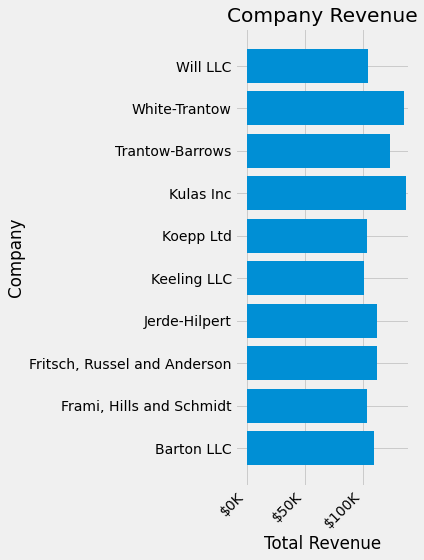

In [13]:
fig, ax = plt.subplots(figsize=(6, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company', title='Company Revenue')
ax.xaxis.set_major_formatter(currency)

## 将多种可视化类型结合起来
你可以在同一个`axes.Axes`的实例上绘制多个绘图，只需要在这个axes对象上多次调用绘图方法就可以。

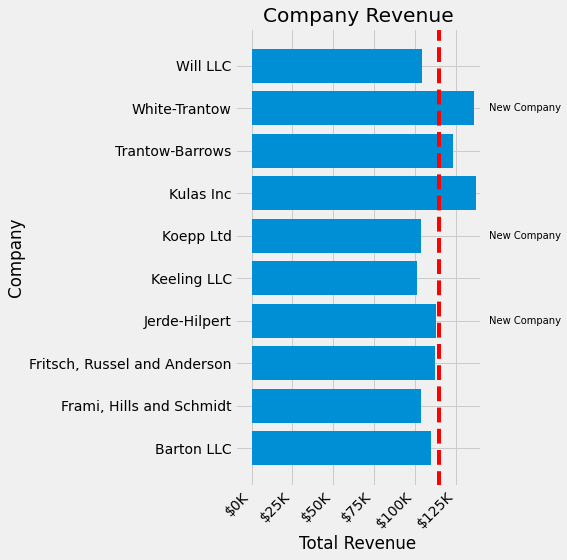

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# 增加一条垂直线，调用函数的时候顺便设置了一下线的风格
ax.axvline(group_mean, ls='--', color='r')

# 标注新公司
for group in [3, 5, 8]:
    ax.text(145000, group, 'New Company', fontsize=10, verticalalignment="center")
    
# 把标题往上移一点，因为它看起来周围有点挤
ax.title.set(y=1.05)

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company', title='Company Revenue')
ax.xaxis.set_major_formatter(currency)
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
fig.subplots_adjust(right=0.1)

plt.show()

## 保存绘图
既然我们已经得到了满意的绘图结果，那就将它进行存储吧。在Matplotlib中，我们可以将绘图保存成很多种格式。使用下面的代码可以查看你可以选择的格式：

In [15]:
print(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format'}


我们可以使用`figure.Figure.savefig()`将图像保存到硬盘里。注意我们在下面的代码中展示了几个非常有用的参数：
- `transparent=True`可以在支持透明色的图像格式中将存储图像的背景设置为透明。
- `dpi=80`控制了输出图像的分辨率（dpi=每英寸点数）。
- `bbox_inches="tight"`让输出图像的边缘紧贴我们的绘图。

In [16]:
# 若要保存图像，取消下面代码的注释
# fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")